In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams.update({'font.size': 14})
from scipy.stats import linregress
from scipy.stats import pearsonr, spearmanr
from scipy.stats import ranksums
from scipy.stats import ttest_ind
from scipy.spatial import distance
from glob import glob
from sklearn.metrics import mean_squared_error

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)

In [3]:
#load info
Patient_Info = pd.read_csv('/Users/dawonchoi/Documents/HKUST/Y3/Summer/UROP 2200/Initial Recurrence/initial_info.csv', index_col=0)

In [4]:
#load initial file
Initial_relative = pd.read_table('/Users/dawonchoi/Documents/HKUST/Y3/Summer/UROP 2200/Initial Recurrence/initial_relative.txt', index_col=0)
Initial_relative.index = Initial_relative.index.map(lambda x: str(x)[:-2])

In [5]:
#load recurrence file
Recurrence_relative = pd.read_table('/Users/dawonchoi/Documents/HKUST/Y3/Summer/UROP 2200/Initial Recurrence/recurrence_relative.txt', index_col=0)
Recurrence_relative.index = Recurrence_relative.index.map(lambda x: str(x)[:-2])

In [6]:
#add patient info for the ones with initial data
common = Initial_relative.index.intersection(Patient_Info.index)
common2 = Recurrence_relative.index.intersection(Patient_Info.index)
final_common = Recurrence_relative.index.intersection(Initial_relative.index)
final_common

Index(['PS001', 'PS002', 'PS003', 'PS004', 'PS005', 'PS006', 'PS007', 'PS008',
       'PS009', 'PS010',
       ...
       'PSX20', 'PSX18', 'PSX01', 'PSX14', 'PSX07', 'PSX09', 'PSX08', 'PSX02',
       'PSX05', 'PSX13'],
      dtype='object', name='Mixture', length=181)

In [7]:
combined_data = Patient_Info
combined_data = combined_data[combined_data.index.isin(final_common)]
pathology = combined_data.loc[:, combined_data.columns == "Molecular pathology (per GLASS)"]

In [8]:
#selecting for glioblastoma
select = pathology[pathology['Molecular pathology (per GLASS)'].str.contains("Glioblastoma")]
pathology.loc[select.index, 'Histology'] = "Glioblastoma"

/Users/dawonchoi/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/dawonchoi/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [9]:
#selecting for Diffuse Astrocytoma
select2 = pathology[pathology['Molecular pathology (per GLASS)'].str.contains("Diffuse Astrocytoma")]
pathology.loc[select2.index, 'Histology'] = "Diffuse Astrocytoma"

/Users/dawonchoi/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/dawonchoi/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [10]:
#selecting for Anaplastic Astrocytoma
select3 = pathology[pathology['Molecular pathology (per GLASS)'].str.contains("Anaplastic Astrocytoma")]
pathology.loc[select3.index, 'Histology'] = "Anaplastic Astrocytoma"

In [11]:
#selecting for Oligodendroglioma
select4 = pathology[pathology['Molecular pathology (per GLASS)'].str.contains("Oligodendroglioma")]
pathology.loc[select4.index, 'Histology'] = "Oligodendroglioma"

In [12]:
#selecting for Anaplastic Oligodendroglioma
select5 = pathology[pathology['Molecular pathology (per GLASS)'].str.contains("Anaplastic Oligodendroglioma")]
pathology.loc[select5.index, 'Histology'] = "Anaplastic Oligodendroglioma"

In [13]:
initial_final = pd.concat([pathology, Initial_relative], axis=1)
initial_final = initial_final[initial_final.index.isin(final_common)]
initial_final.index.name = 'Mixture'
initial_final = initial_final.drop(['Molecular pathology (per GLASS)', 'P-value','Correlation','RMSE'], axis=1)
initial_final = initial_final.sort_values(by='Mixture')
initial_final['Type'] = 'Initial'
initial_final

Histology   Naive B  Memory B  CD8+ naive T  \
Mixture                                                                   
PS001                    Glioblastoma  0.015223  0.016476      0.025262   
PS002                    Glioblastoma  0.026615  0.008370      0.042649   
PS003                    Glioblastoma  0.026402  0.023463      0.048903   
PS004                    Glioblastoma  0.012746  0.024343      0.032605   
PS005                    Glioblastoma  0.020502  0.022985      0.043766   
PS006                    Glioblastoma  0.021856  0.026483      0.046271   
PS007                    Glioblastoma  0.023187  0.020232      0.044268   
PS008                    Glioblastoma  0.037530  0.022950      0.071441   
PS009                    Glioblastoma  0.019884  0.039373      0.071027   
PS010                    Glioblastoma  0.037247  0.022175      0.055063   
PS012                    Glioblastoma  0.028530  0.020385      0.067879   
PS019                    Glioblastoma  0.025057  0.012090      0.048198   
PS020                    Glioblastoma  0.012768  0.021876      0.037062   
PS021                    Glioblastoma  0.016553  0.022950      0.039311   
PS022                    Glioblastoma  0.016815  0.016103      0.022799   
PS023                    Glioblastoma  0.022190  0.018997      0.053882   
PS024                    Glioblastoma  0.014464  0.024374      0.028154   
PS025                    Glioblastoma  0.006497  0.019130      0.029134   
PS026                    Glioblastoma  0.012752  0.025196      0.041293   
PS027                    Glioblastoma  0.009274  0.042195      0.074094   
PS029                    Glioblastoma  0.018469  0.017226      0.029188   
PS030                    Glioblastoma  0.015921  0.025201      0.046324   
PS033                    Glioblastoma  0.014644  0.014767      0.029985   
PS034                    Glioblastoma  0.017279  0.016843      0.023671   
PS035                    Glioblastoma  0.028534  0.014988      0.054946   
PS038                    Glioblastoma  0.013277  0.015126      0.033605   
PS042                    Glioblastoma  0.009412  0.016656      0.020210   
PS056                    Glioblastoma  0.027076  0.009827      0.039619   
PS060                    Glioblastoma  0.018784  0.013568      0.042968   
PS061                    Glioblastoma  0.023556  0.010399      0.044532   
PS063                    Glioblastoma  0.013800  0.022275      0.025719   
PS064                    Glioblastoma  0.021346  0.016678      0.043596   
PS065                    Glioblastoma  0.022793  0.020476      0.030349   
PS066                    Glioblastoma  0.020680  0.022929      0.040663   
PS067                    Glioblastoma  0.017651  0.013387      0.037801   
PS068                    Glioblastoma  0.026143  0.011546      0.060845   
PS070                    Glioblastoma  0.023289  0.020534      0.046532   
PS071                    Glioblastoma  0.039721  0.003262      0.073405   
PS072                    Glioblastoma  0.023314  0.023479      0.051966   
PS074                    Glioblastoma  0.017601  0.020606      0.052593   
PS076                    Glioblastoma  0.039041  0.020138      0.082395   
PS078                    Glioblastoma  0.022523  0.014726      0.042940   
PS080                    Glioblastoma  0.022059  0.026846      0.049434   
PS081                    Glioblastoma  0.026093  0.017011      0.061901   
PS082                    Glioblastoma  0.014732  0.014833      0.036332   
PS083                    Glioblastoma  0.017143  0.018221      0.038892   
PS084                    Glioblastoma  0.027706  0.030462      0.061863   
PS085                    Glioblastoma  0.011918  0.017771      0.021839   
PS087                    Glioblastoma  0.018362  0.014987      0.036930   
PS088                    Glioblastoma  0.012666  0.023756      0.037552   
PS089                    Glioblastoma  0.020260  0.022592      0.054405   
PS090                    Glioblastoma  0.015482  0.01

In [14]:
recurrence_final = pd.concat([pathology, Recurrence_relative], axis=1)
recurrence_final = recurrence_final[recurrence_final.index.isin(final_common)]
recurrence_final.index.name = 'Mixture'
recurrence_final = recurrence_final.drop(['Molecular pathology (per GLASS)', 'P-value','Correlation','RMSE'], axis=1)
recurrence_final = recurrence_final.sort_values(by='Mixture')
recurrence_final['Type'] = 'Recurrence'
recurrence_final

Histology   Naive B  Memory B  CD8+ naive T  \
Mixture                                                                   
PS001                    Glioblastoma  0.010646  0.034658      0.043764   
PS002                    Glioblastoma  0.005990  0.036620      0.038919   
PS003                    Glioblastoma  0.002118  0.042886      0.038200   
PS004                    Glioblastoma  0.009139  0.022280      0.025013   
PS005                    Glioblastoma  0.016154  0.035486      0.067070   
PS006                    Glioblastoma  0.017559  0.023245      0.042248   
PS007                    Glioblastoma  0.009475  0.025170      0.019052   
PS008                    Glioblastoma  0.023126  0.042127      0.097055   
PS009                    Glioblastoma  0.020228  0.035143      0.070711   
PS010                    Glioblastoma  0.008824  0.048921      0.069352   
PS012                    Glioblastoma  0.029245  0.047166      0.083545   
PS019                    Glioblastoma  0.017949  0.021645      0.031157   
PS020                    Glioblastoma  0.015983  0.022748      0.038624   
PS021                    Glioblastoma  0.010327  0.015418      0.027242   
PS022                    Glioblastoma  0.014433  0.027579      0.040121   
PS023                    Glioblastoma  0.015608  0.030988      0.040678   
PS024                    Glioblastoma  0.012855  0.017199      0.032427   
PS025                    Glioblastoma  0.001258  0.020859      0.031457   
PS026                    Glioblastoma  0.010013  0.023799      0.026040   
PS027                    Glioblastoma  0.018558  0.032658      0.054314   
PS029                    Glioblastoma  0.012716  0.028707      0.054511   
PS030                    Glioblastoma  0.016852  0.024300      0.033988   
PS033                    Glioblastoma  0.013457  0.010852      0.029792   
PS034                    Glioblastoma  0.014229  0.015534      0.018270   
PS035                    Glioblastoma  0.018088  0.015181      0.027289   
PS038                    Glioblastoma  0.020191  0.024372      0.045371   
PS042                    Glioblastoma  0.010456  0.018338      0.034488   
PS056                    Glioblastoma  0.020466  0.029819      0.057166   
PS060                    Glioblastoma  0.006057  0.034410      0.051164   
PS061                    Glioblastoma  0.008716  0.031391      0.054671   
PS063                    Glioblastoma  0.011074  0.022658      0.026650   
PS064                    Glioblastoma  0.015603  0.021129      0.060430   
PS065                    Glioblastoma  0.011833  0.034724      0.051741   
PS066                    Glioblastoma  0.008604  0.035384      0.045343   
PS067                    Glioblastoma  0.001742  0.026742      0.031475   
PS068                    Glioblastoma  0.006114  0.038956      0.054633   
PS070                    Glioblastoma  0.025826  0.029720      0.057685   
PS071                    Glioblastoma  0.021918  0.029521      0.070057   
PS072                    Glioblastoma  0.007311  0.036752      0.041171   
PS074                    Glioblastoma  0.010529  0.026511      0.029561   
PS076                    Glioblastoma  0.039269  0.012475      0.121473   
PS078                    Glioblastoma  0.013568  0.034221      0.039395   
PS080                    Glioblastoma  0.018649  0.032148      0.052571   
PS081                    Glioblastoma  0.019293  0.040814      0.058091   
PS082                    Glioblastoma  0.005841  0.031049      0.041884   
PS083                    Glioblastoma  0.007597  0.037614      0.056777   
PS084                    Glioblastoma  0.016665  0.042246      0.048837   
PS085                    Glioblastoma  0.015749  0.020784      0.028876   
PS087                    Glioblastoma  0.018331  0.037566      0.074850   
PS088                    Glioblastoma  0.014591  0.033529      0.031719   
PS089                    Glioblastoma  0.006804  0.031745      0.038051   
PS090                    Glioblastoma  0.011408  0.02

In [15]:
finalfinal = pd.concat([initial_final, recurrence_final]) 
finalfinal

Histology   Naive B  Memory B  CD8+ naive T  \
Mixture                                                                   
PS001                    Glioblastoma  0.015223  0.016476      0.025262   
PS002                    Glioblastoma  0.026615  0.008370      0.042649   
PS003                    Glioblastoma  0.026402  0.023463      0.048903   
PS004                    Glioblastoma  0.012746  0.024343      0.032605   
PS005                    Glioblastoma  0.020502  0.022985      0.043766   
PS006                    Glioblastoma  0.021856  0.026483      0.046271   
PS007                    Glioblastoma  0.023187  0.020232      0.044268   
PS008                    Glioblastoma  0.037530  0.022950      0.071441   
PS009                    Glioblastoma  0.019884  0.039373      0.071027   
PS010                    Glioblastoma  0.037247  0.022175      0.055063   
PS012                    Glioblastoma  0.028530  0.020385      0.067879   
PS019                    Glioblastoma  0.025057  0.012090      0.048198   
PS020                    Glioblastoma  0.012768  0.021876      0.037062   
PS021                    Glioblastoma  0.016553  0.022950      0.039311   
PS022                    Glioblastoma  0.016815  0.016103      0.022799   
PS023                    Glioblastoma  0.022190  0.018997      0.053882   
PS024                    Glioblastoma  0.014464  0.024374      0.028154   
PS025                    Glioblastoma  0.006497  0.019130      0.029134   
PS026                    Glioblastoma  0.012752  0.025196      0.041293   
PS027                    Glioblastoma  0.009274  0.042195      0.074094   
PS029                    Glioblastoma  0.018469  0.017226      0.029188   
PS030                    Glioblastoma  0.015921  0.025201      0.046324   
PS033                    Glioblastoma  0.014644  0.014767      0.029985   
PS034                    Glioblastoma  0.017279  0.016843      0.023671   
PS035                    Glioblastoma  0.028534  0.014988      0.054946   
PS038                    Glioblastoma  0.013277  0.015126      0.033605   
PS042                    Glioblastoma  0.009412  0.016656      0.020210   
PS056                    Glioblastoma  0.027076  0.009827      0.039619   
PS060                    Glioblastoma  0.018784  0.013568      0.042968   
PS061                    Glioblastoma  0.023556  0.010399      0.044532   
PS063                    Glioblastoma  0.013800  0.022275      0.025719   
PS064                    Glioblastoma  0.021346  0.016678      0.043596   
PS065                    Glioblastoma  0.022793  0.020476      0.030349   
PS066                    Glioblastoma  0.020680  0.022929      0.040663   
PS067                    Glioblastoma  0.017651  0.013387      0.037801   
PS068                    Glioblastoma  0.026143  0.011546      0.060845   
PS070                    Glioblastoma  0.023289  0.020534      0.046532   
PS071                    Glioblastoma  0.039721  0.003262      0.073405   
PS072                    Glioblastoma  0.023314  0.023479      0.051966   
PS074                    Glioblastoma  0.017601  0.020606      0.052593   
PS076                    Glioblastoma  0.039041  0.020138      0.082395   
PS078                    Glioblastoma  0.022523  0.014726      0.042940   
PS080                    Glioblastoma  0.022059  0.026846      0.049434   
PS081                    Glioblastoma  0.026093  0.017011      0.061901   
PS082                    Glioblastoma  0.014732  0.014833      0.036332   
PS083                    Glioblastoma  0.017143  0.018221      0.038892   
PS084                    Glioblastoma  0.027706  0.030462      0.061863   
PS085                    Glioblastoma  0.011918  0.017771      0.021839   
PS087                    Glioblastoma  0.018362  0.014987      0.036930   
PS088                    Glioblastoma  0.012666  0.023756      0.037552   
PS089                    Glioblastoma  0.020260  0.022592      0.054405   
PS090                    Glioblastoma  0.015482  0.01

In [16]:
final_mdf = pd.melt(finalfinal.reset_index(), id_vars=('Mixture', 'Type','Histology'))
final_mdf

Mixture        Type                     Histology             variable  \
0      PS001     Initial                  Glioblastoma              Naive B   
1      PS002     Initial                  Glioblastoma              Naive B   
2      PS003     Initial                  Glioblastoma              Naive B   
3      PS004     Initial                  Glioblastoma              Naive B   
4      PS005     Initial                  Glioblastoma              Naive B   
5      PS006     Initial                  Glioblastoma              Naive B   
6      PS007     Initial                  Glioblastoma              Naive B   
7      PS008     Initial                  Glioblastoma              Naive B   
8      PS009     Initial                  Glioblastoma              Naive B   
9      PS010     Initial                  Glioblastoma              Naive B   
10     PS012     Initial                  Glioblastoma              Naive B   
11     PS019     Initial                  Glioblastoma              Naive B   
12     PS020     Initial                  Glioblastoma              Naive B   
13     PS021     Initial                  Glioblastoma              Naive B   
14     PS022     Initial                  Glioblastoma              Naive B   
15     PS023     Initial                  Glioblastoma              Naive B   
16     PS024     Initial                  Glioblastoma              Naive B   
17     PS025     Initial                  Glioblastoma              Naive B   
18     PS026     Initial                  Glioblastoma              Naive B   
19     PS027     Initial                  Glioblastoma              Naive B   
20     PS029     Initial                  Glioblastoma              Naive B   
21     PS030     Initial                  Glioblastoma              Naive B   
22     PS033     Initial                  Glioblastoma              Naive B   
23     PS034     Initial                  Glioblastoma              Naive B   
24     PS035     Initial                  Glioblastoma              Naive B   
25     PS038     Initial                  Glioblastoma              Naive B   
26     PS042     Initial                  Glioblastoma              Naive B   
27     PS056     Initial                  Glioblastoma              Naive B   
28     PS060     Initial                  Glioblastoma              Naive B   
29     PS061     Initial                  Glioblastoma              Naive B   
30     PS063     Initial                  Glioblastoma              Naive B   
31     PS064     Initial                  Glioblastoma              Naive B   
32     PS065     Initial                  Glioblastoma              Naive B   
33     PS066     Initial                  Glioblastoma              Naive B   
34     PS067     Initial                  Glioblastoma              Naive B   
35     PS068     Initial                  Glioblastoma              Naive B   
36     PS070     Initial                  Glioblastoma              Naive B   
37     PS071     Initial                  Glioblastoma              Naive B   
38     PS072     Initial                  Glioblastoma              Naive B   
39     PS074     Initial                  Glioblastoma              Naive B   
40     PS076     Initial                  Glioblastoma              Naive B   
41     PS078     Initial                  Glioblastoma              Naive B   
42     PS080     Initial                  Glioblastoma              Naive B   
43     PS081     Initial                  Glioblastoma              Naive B   
44     PS082     Initial                  Glioblastoma              Naive B   
45     PS083     Initial                  Glioblastoma              Naive B   
46     PS084     Initial                  Glioblastoma              Naive B   
47     PS085     Initial                  Glioblastoma              Naive B   
48     PS087     Initial                  Glioblastoma              Naive B   
49     PS088     Initial                  Glioblastoma 

Naive B
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Diffuse Astrocytoma_Initial v.s. Diffuse Astrocytoma_Recurrence: t-test independent samples with Bonferroni correction, P_val=7.845e-03 stat=3.330e+00
Glioblastoma_Initial v.s. Glioblastoma_Recurrence: t-test independent samples with Bonferroni correction, P_val=6.825e-11 stat=7.099e+00
Anaplastic Astrocytoma_Initial v.s. Anaplastic Astrocytoma_Recurrence: t-test independent samples with Bonferroni correction, P_val=1.040e-01 stat=2.490e+00
Oligodendroglioma_Initial v.s. Oligodendroglioma_Recurrence: t-test independent samples with Bonferroni correction, P_val=1.519e-01 stat=2.350e+00
Anaplastic Oligodendroglioma_Initial v.s. Anaplastic Oligodendroglioma_Recurrence: t-test independent samples with Bonferroni correction, P_val=6.706e-01 stat=1.590e+00
Memory B
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*:

<ipython-input-21-93e52467efa9>:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(5,5.1))


Diffuse Astrocytoma_Initial v.s. Diffuse Astrocytoma_Recurrence: t-test independent samples with Bonferroni correction, P_val=7.584e-02 stat=2.508e+00
Glioblastoma_Initial v.s. Glioblastoma_Recurrence: t-test independent samples with Bonferroni correction, P_val=9.423e-01 stat=-1.319e+00
Anaplastic Astrocytoma_Initial v.s. Anaplastic Astrocytoma_Recurrence: t-test independent samples with Bonferroni correction, P_val=8.385e-01 stat=1.427e+00
Oligodendroglioma_Initial v.s. Oligodendroglioma_Recurrence: t-test independent samples with Bonferroni correction, P_val=1.538e-01 stat=2.344e+00
Anaplastic Oligodendroglioma_Initial v.s. Anaplastic Oligodendroglioma_Recurrence: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=1.779e-01
DC
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Diffuse Astrocytoma_Initial v.s. Diffuse Astrocytoma_Recurrence: t-test

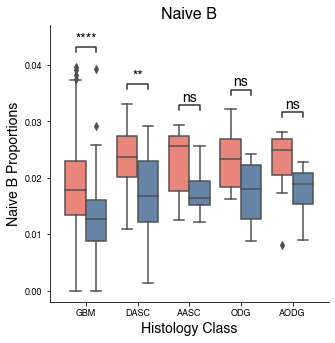

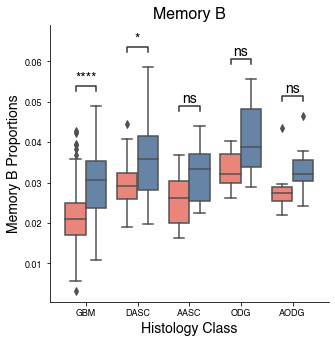

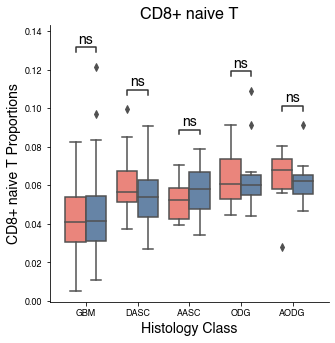

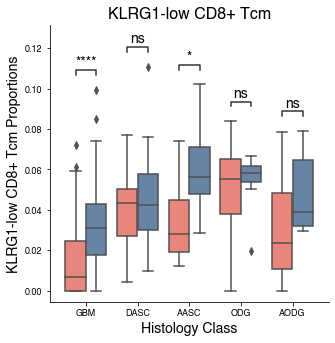

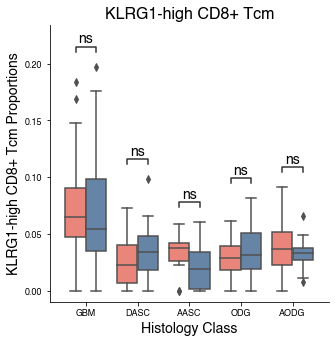

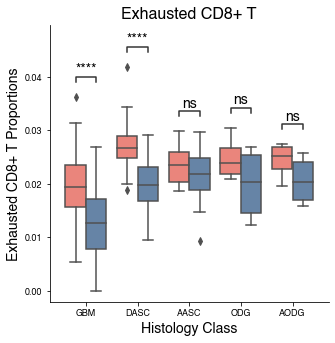

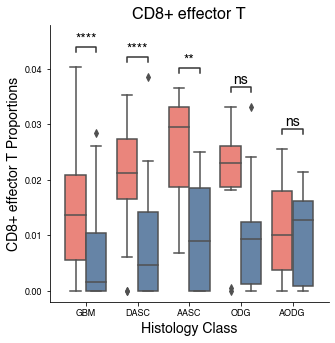

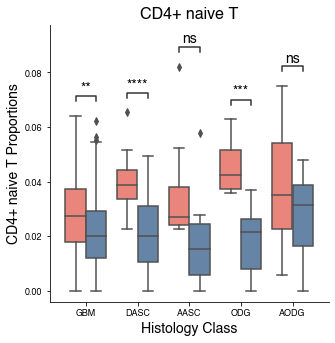

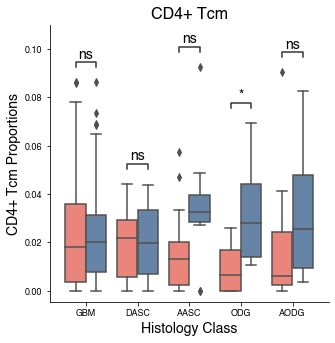

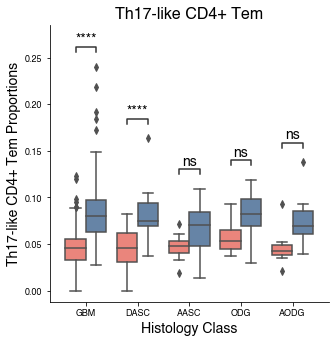

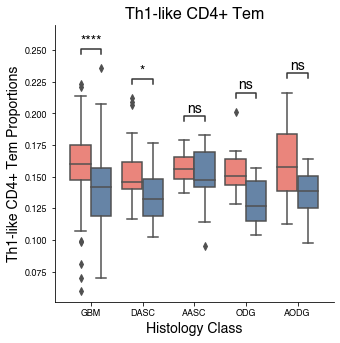

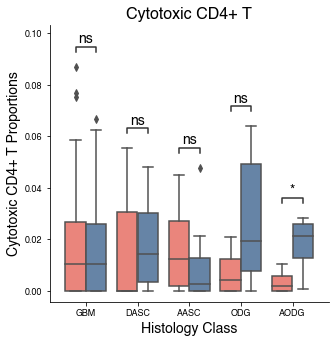

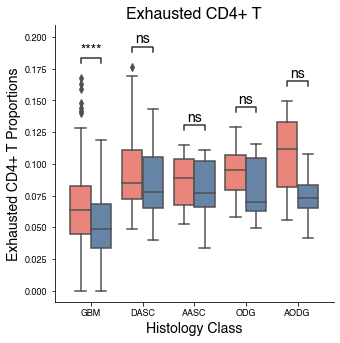

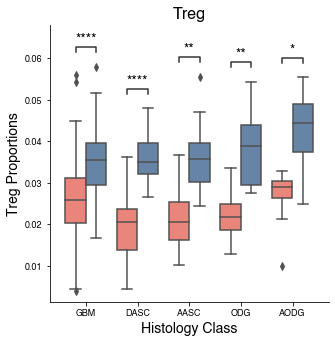

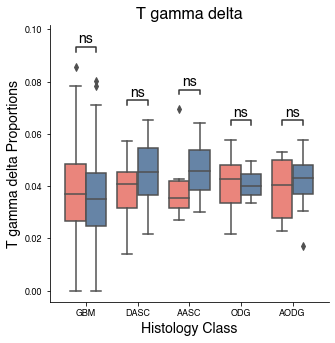

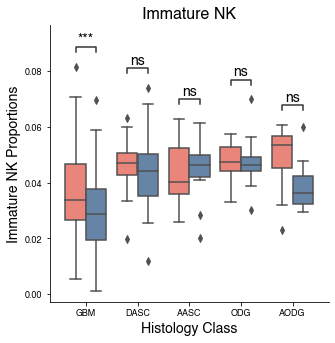

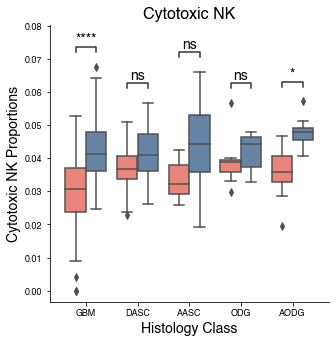

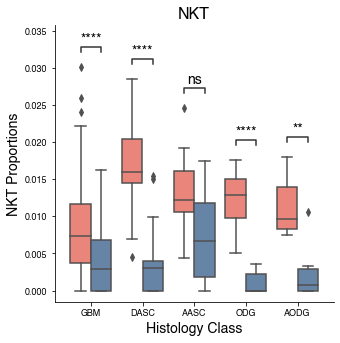

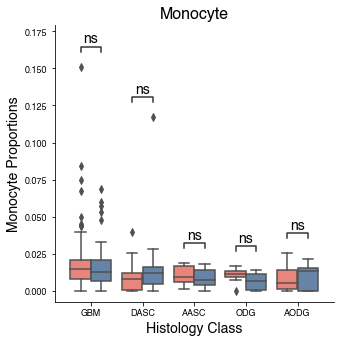

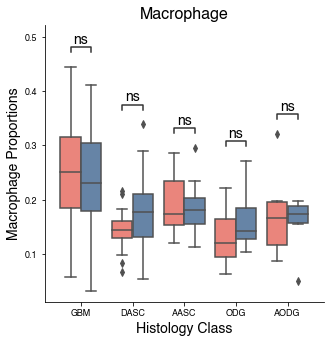

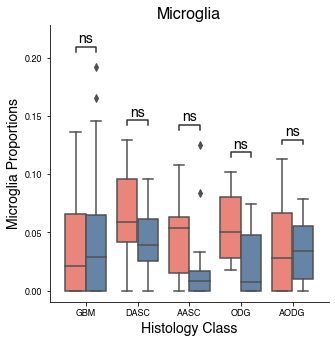

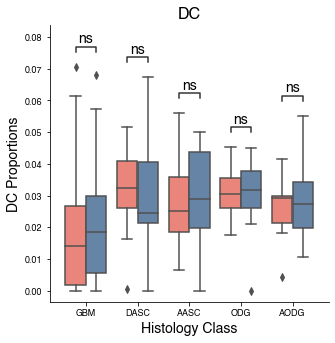

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
colors = ["#FC766AFF","#5B84B1FF"]
sns.set_palette(sns.color_palette(colors))
import statannot
box_pairs=[
    (("Glioblastoma", "Initial"), ("Glioblastoma", "Recurrence")),
    (("Diffuse Astrocytoma", "Initial"), ("Diffuse Astrocytoma", "Recurrence")),
    (("Anaplastic Astrocytoma", "Initial"), ("Anaplastic Astrocytoma", "Recurrence")),
    (("Oligodendroglioma", "Initial"), ("Oligodendroglioma", "Recurrence")),
    (("Anaplastic Oligodendroglioma", "Initial"), ("Anaplastic Oligodendroglioma", "Recurrence"))
    ]

cells = list(Initial_relative.T[0:22].index)
for c in cells:
    print(c)
    tmp = final_mdf.loc[final_mdf['variable'] == c]
    plt.figure(figsize=(5,5.1))
    #plt.rcParams['font.size'] = '8'
    plt.title(c, fontsize=16)
    plt.xticks(fontsize=9)
    plt.yticks(fontsize=9)
    ax = sns.boxplot(x='Histology', y='value',hue="Type", data=tmp)
    ax.set_xlabel("Histology Class", fontsize=14)
    ax.set_ylabel(c+" Proportions", fontsize=14)  
    labels = ["GBM", "DASC", "AASC", "ODG", "AODG"]
    ax.set_xticklabels(labels)
    ax.legend(loc='upper right', fontsize=12,title='Type',title_fontsize=12,borderpad=.5, labelspacing=.5)
    
    plt.legend([],[], frameon=False)
#     ax.legend(loc='upper left',bbox_to_anchor=(1,1), fontsize=12,title='Type',title_fontsize=12,borderpad=.5, labelspacing=.5)
    sns.despine()
   
    statannot.add_stat_annotation(
        ax,
        data=tmp,
        x='Histology',
        y='value',
        hue="Type",
        box_pairs=box_pairs,
        test="t-test_ind",
        text_format="star",
        loc="inside",
    )
    plt.savefig(c+'.png')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Diffuse Astrocytoma_Initial v.s. Diffuse Astrocytoma_Recurrence: t-test independent samples with Bonferroni correction, P_val=1.230e-12 stat=-9.640e+00
Glioblastoma_Initial v.s. Glioblastoma_Recurrence: t-test independent samples with Bonferroni correction, P_val=8.842e-15 stat=-8.511e+00
Anaplastic Astrocytoma_Initial v.s. Anaplastic Astrocytoma_Recurrence: t-test independent samples with Bonferroni correction, P_val=1.283e-03 stat=-4.350e+00
Oligodendroglioma_Initial v.s. Oligodendroglioma_Recurrence: t-test independent samples with Bonferroni correction, P_val=1.877e-03 stat=-4.362e+00
Anaplastic Oligodendroglioma_Initial v.s. Anaplastic Oligodendroglioma_Recurrence: t-test independent samples with Bonferroni correction, P_val=2.134e-02 stat=-3.405e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < 

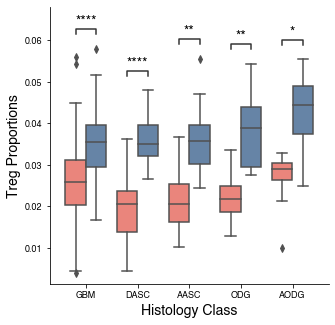

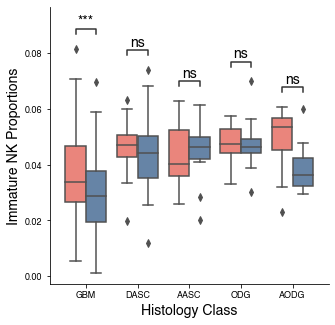

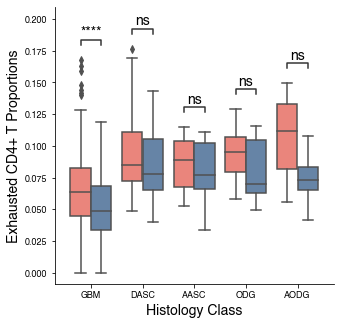

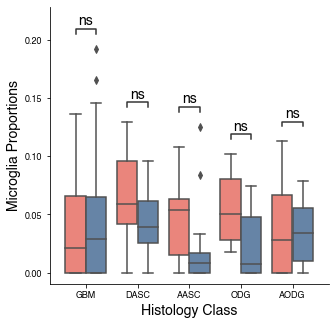

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
colors = ["#FC766AFF","#5B84B1FF"]
sns.set_palette(sns.color_palette(colors))
import statannot
box_pairs=[
    (("Glioblastoma", "Initial"), ("Glioblastoma", "Recurrence")),
    (("Diffuse Astrocytoma", "Initial"), ("Diffuse Astrocytoma", "Recurrence")),
    (("Anaplastic Astrocytoma", "Initial"), ("Anaplastic Astrocytoma", "Recurrence")),
    (("Oligodendroglioma", "Initial"), ("Oligodendroglioma", "Recurrence")),
    (("Anaplastic Oligodendroglioma", "Initial"), ("Anaplastic Oligodendroglioma", "Recurrence"))
    ]

cells = ["Treg", "Immature NK", "Exhausted CD4+ T", "Microglia"]
for c in cells:
    tmp = final_mdf.loc[final_mdf['variable'] == c]
    plt.figure(figsize=(5,5.1))
    #plt.rcParams['font.size'] = '8'
    #plt.title(c, fontsize=16)
    plt.xticks(fontsize=9)
    plt.yticks(fontsize=9)
    ax = sns.boxplot(x='Histology', y='value',hue="Type", data=tmp)
    ax.set_xlabel("Histology Class", fontsize=14)
    ax.set_ylabel(c+" Proportions", fontsize=14)  
    labels = ["GBM", "DASC", "AASC", "ODG", "AODG"]
    ax.set_xticklabels(labels)
    #ax.legend(loc='upper right', fontsize=12,title='Type',title_fontsize=12,borderpad=.5, labelspacing=.5)
    
    plt.legend([],[], frameon=False)
#     ax.legend(loc='upper left',bbox_to_anchor=(1,1), fontsize=12,title='Type',title_fontsize=12,borderpad=.5, labelspacing=.5)
    sns.despine()
   
    statannot.add_stat_annotation(
        ax,
        data=tmp,
        x='Histology',
        y='value',
        hue="Type",
        box_pairs=box_pairs,
        test="t-test_ind",
        text_format="star",
        loc="inside",
    )
    plt.savefig(c+'.png')


In [19]:
histologies = ['Glioblastoma','Diffuse Astrocytoma','Anaplastic Astrocytoma','Oligodendroglioma','Anaplastic Oligodendroglioma']

for c in cells:
    specific_cell_type = final_mdf.loc[final_mdf['variable'] == c]
    for h in histologies:
        specific_histology = specific_cell_type.loc[specific_cell_type['Histology'] == h]
        first = specific_histology.loc[specific_histology['Type'] == 'Initial']
        second = specific_histology.loc[specific_histology['Type'] == 'Recurrence']
        print(c,' - ', h)
        print('Between Initial and Recurrence: ')
        print(ranksums(first.iloc[:,4], second.iloc[:,4]))
        print ('--------------------------------')

Treg  -  Glioblastoma
Between Initial and Recurrence: 
RanksumsResult(statistic=-7.860590436567889, pvalue=3.823269672548825e-15)
--------------------------------
Treg  -  Diffuse Astrocytoma
Between Initial and Recurrence: 
RanksumsResult(statistic=-5.997582756901829, pvalue=2.0027630771080284e-09)
--------------------------------
Treg  -  Anaplastic Astrocytoma
Between Initial and Recurrence: 
RanksumsResult(statistic=-3.348631561299829, pvalue=0.0008121171348941295)
--------------------------------
Treg  -  Oligodendroglioma
Between Initial and Recurrence: 
RanksumsResult(statistic=-3.1749015732775088, pvalue=0.001498873337151676)
--------------------------------
Treg  -  Anaplastic Oligodendroglioma
Between Initial and Recurrence: 
RanksumsResult(statistic=-2.2054411323441157, pvalue=0.027423154381354665)
--------------------------------
Immature NK  -  Glioblastoma
Between Initial and Recurrence: 
RanksumsResult(statistic=3.769463577640614, pvalue=0.00016359877942849328)
---------